# Codeathon 1: building a system to predict housing prices in Boston, MA

*Cameron Woodward (cnw2bx)*

# Step 1. Big Picture

The purspose of this codeathon is to train a model on a Boston Massachusett's housing data set. If done right and fine tuned to a low enough RMSE, it should be able to predict the housing prices in Boston given certain paramaters. 

Now, let's begin by importing some libraries we know we are going to use:

In [ ]:
import sklearn
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


# Step 2. Get the Data

*   Loading the data from uploaded *housing.csv* file (downloaded from Kaggle)
*   Seperating on whitespace (the .csv file from Kaggle put every value in one cell)
*   Lastly, adding headers to the columns of data



In [ ]:
import pandas as pd

def load_housing_data():
    """Load Boston Housing prices from CSV file """
    return pd.read_csv("sample_data/housing.csv", 
                       delim_whitespace=True, 
                       names=["CRIM per capita crime rate by town", "ZN proportion of residential land zoned for lots over 25,000 sq.ft.", "INDUS proportion of non-retail business acres per town", "CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)", "NOX nitric oxides concentration (parts per 10 million)",  "RM average number of rooms per dwelling", "AGE proportion of owner-occupied units built prior to 1940", "DIS weighted distances to five Boston employment centres", "RAD index of accessibility to radial highways", "TAX full-value property-tax rate per $10,000", "PTRATIO pupil-teacher ratio by town", "B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town", "LSTAT % lower status of the population", "MEDV Median value of owner-occupied homes in $1000's"])

housing = load_housing_data()

housing.head(10)

,CRIM per capita crime rate by town,"ZN proportion of residential land zoned for lots over 25,000 sq.ft.",INDUS proportion of non-retail business acres per town,CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),NOX nitric oxides concentration (parts per 10 million),RM average number of rooms per dwelling,AGE proportion of owner-occupied units built prior to 1940,DIS weighted distances to five Boston employment centres,RAD index of accessibility to radial highways,"TAX full-value property-tax rate per $10,000",PTRATIO pupil-teacher ratio by town,B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town,LSTAT % lower status of the population,MEDV Median value of owner-occupied homes in $1000's
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [ ]:
#Summary of data: # of columns, # of entries, and the entry data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   CRIM per capita crime rate by town                                          506 non-null    float64
 1   ZN proportion of residential land zoned for lots over 25,000 sq.ft.         506 non-null    float64
 2   INDUS proportion of non-retail business acres per town                      506 non-null    float64
 3   CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  506 non-null    int64  
 4   NOX nitric oxides concentration (parts per 10 million)                      506 non-null    float64
 5   RM average number of rooms per dwelling                                     506 non-null    float64
 6   AGE proportion of owner-occupied units built prior

In [ ]:
# Provide some basic statistics about the dataset
housing.describe()

,CRIM per capita crime rate by town,"ZN proportion of residential land zoned for lots over 25,000 sq.ft.",INDUS proportion of non-retail business acres per town,CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),NOX nitric oxides concentration (parts per 10 million),RM average number of rooms per dwelling,AGE proportion of owner-occupied units built prior to 1940,DIS weighted distances to five Boston employment centres,RAD index of accessibility to radial highways,"TAX full-value property-tax rate per $10,000",PTRATIO pupil-teacher ratio by town,B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town,LSTAT % lower status of the population,MEDV Median value of owner-occupied homes in $1000's
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


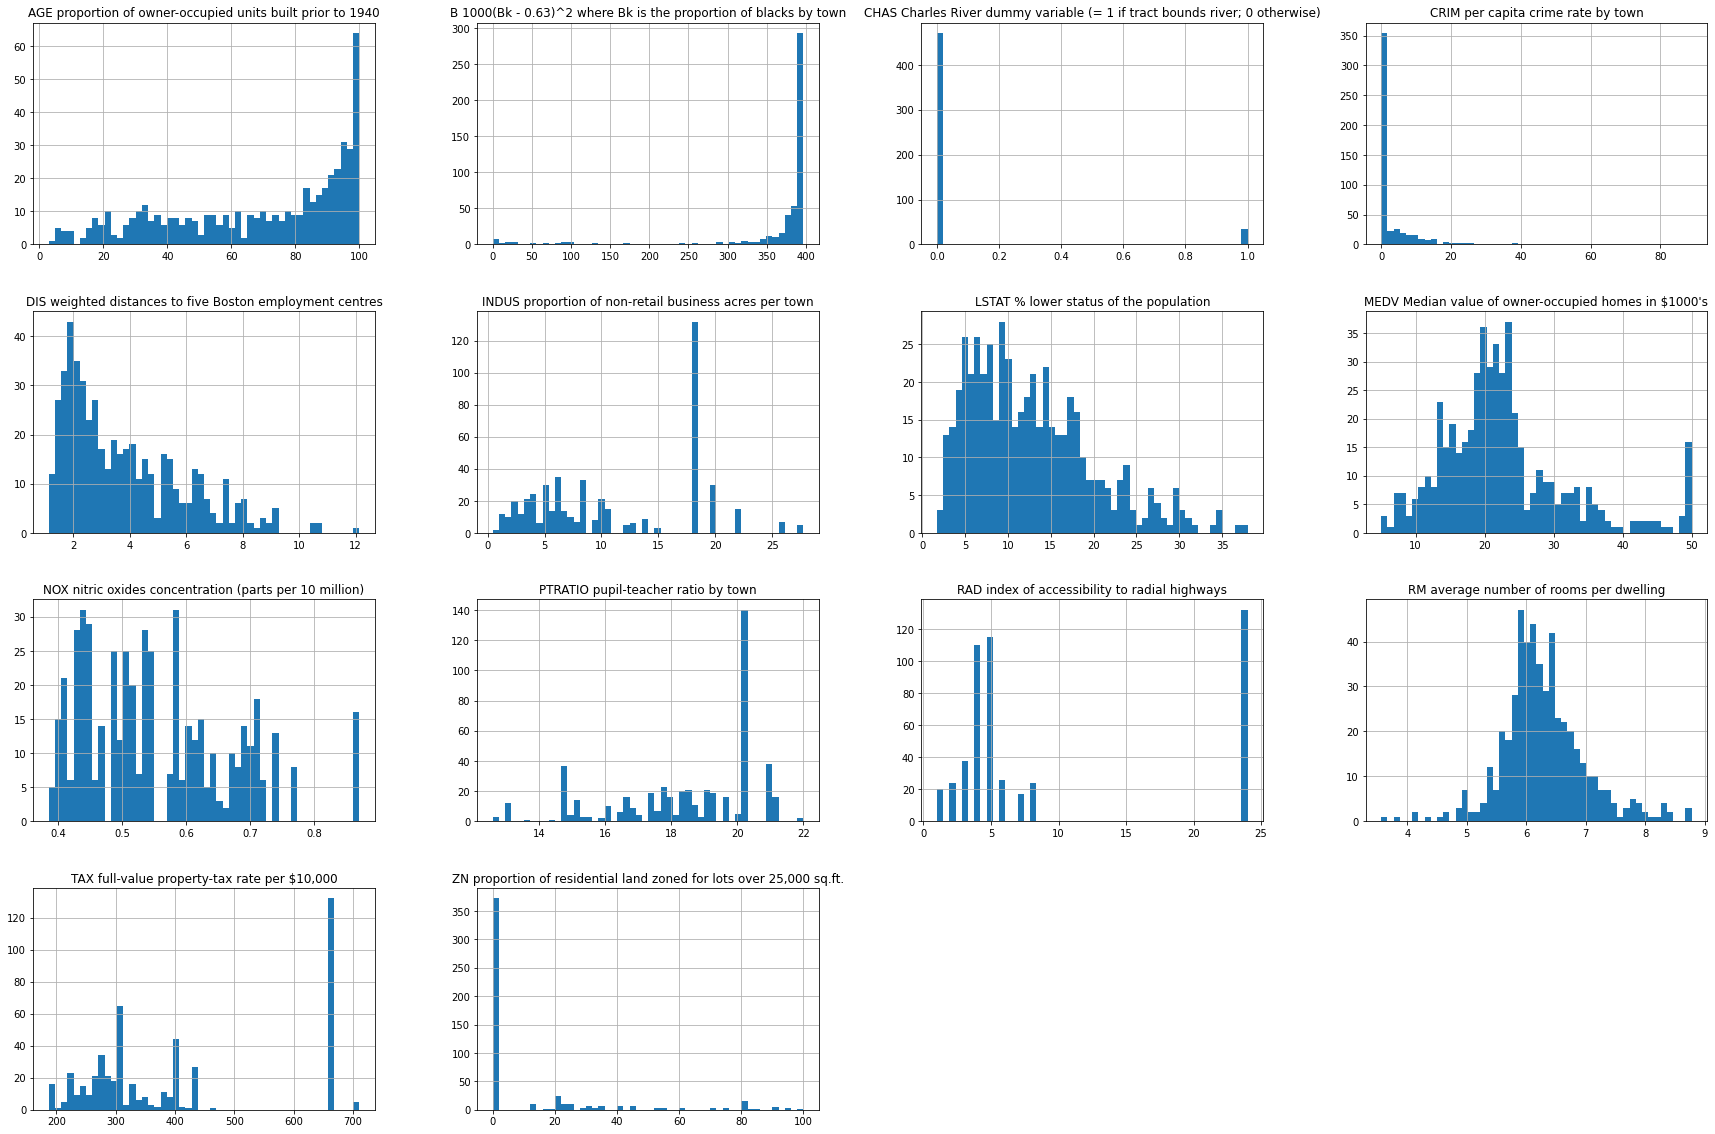

In [ ]:
#Quick visualization using histograms
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(30,20))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=3)

In [ ]:
#See the 80-20 data split in rows
print( train_set.shape )
print( test_set.shape )

(404, 14)
(102, 14)


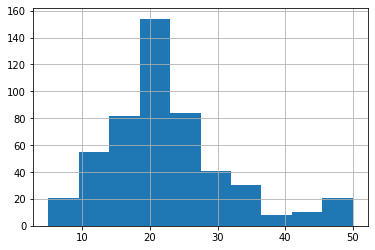

In [ ]:
housing["MEDV Median value of owner-occupied homes in $1000's"].hist()

As seen in the label of the column, this data is shown in thousands (1,000) of dollars and is capped at 50,000.

In [ ]:
#Normalizing data
housing["median_price"] = pd.cut(housing["MEDV Median value of owner-occupied homes in $1000's"],
                                 bins=[0., 15., 30., 45., 60., np.inf],
                                 labels=[1, 2, 3, 4, 5])

In [ ]:
housing["median_price"].value_counts()

2    325
1     97
3     62
4     22
5      0
Name: median_price, dtype: int64

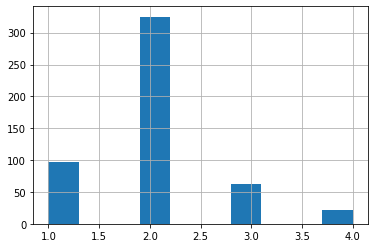

In [ ]:
housing["median_price"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=3)
for train_index, test_index in split.split(housing, housing["median_price"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set["median_price"].value_counts() / len(strat_test_set)

2    0.647059
1    0.196078
3    0.117647
4    0.039216
5    0.000000
Name: median_price, dtype: float64

In [ ]:
housing["median_price"].value_counts() / len(housing)

2    0.642292
1    0.191700
3    0.122530
4    0.043478
5    0.000000
Name: median_price, dtype: float64

As you can see the values are very close to eachother, showing that the stratified sampling is good.

# Step 3. Discover and visualize the data to gain insights

In [ ]:
corr_matrix = housing.corr()
corr_matrix.shape


(14, 14)

In [ ]:
#Seeing the correlation between median price and oher parameters
corr_matrix["MEDV Median value of owner-occupied homes in $1000's"].sort_values(ascending=True)

LSTAT % lower status of the population                                       -0.737663
PTRATIO pupil-teacher ratio by town                                          -0.507787
INDUS proportion of non-retail business acres per town                       -0.483725
TAX full-value property-tax rate per $10,000                                 -0.468536
NOX nitric oxides concentration (parts per 10 million)                       -0.427321
CRIM per capita crime rate by town                                           -0.388305
RAD index of accessibility to radial highways                                -0.381626
AGE proportion of owner-occupied units built prior to 1940                   -0.376955
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)    0.175260
DIS weighted distances to five Boston employment centres                      0.249929
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town              0.333461
ZN proportion of residential land zoned for

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a9e316860>,
      dtype=object)

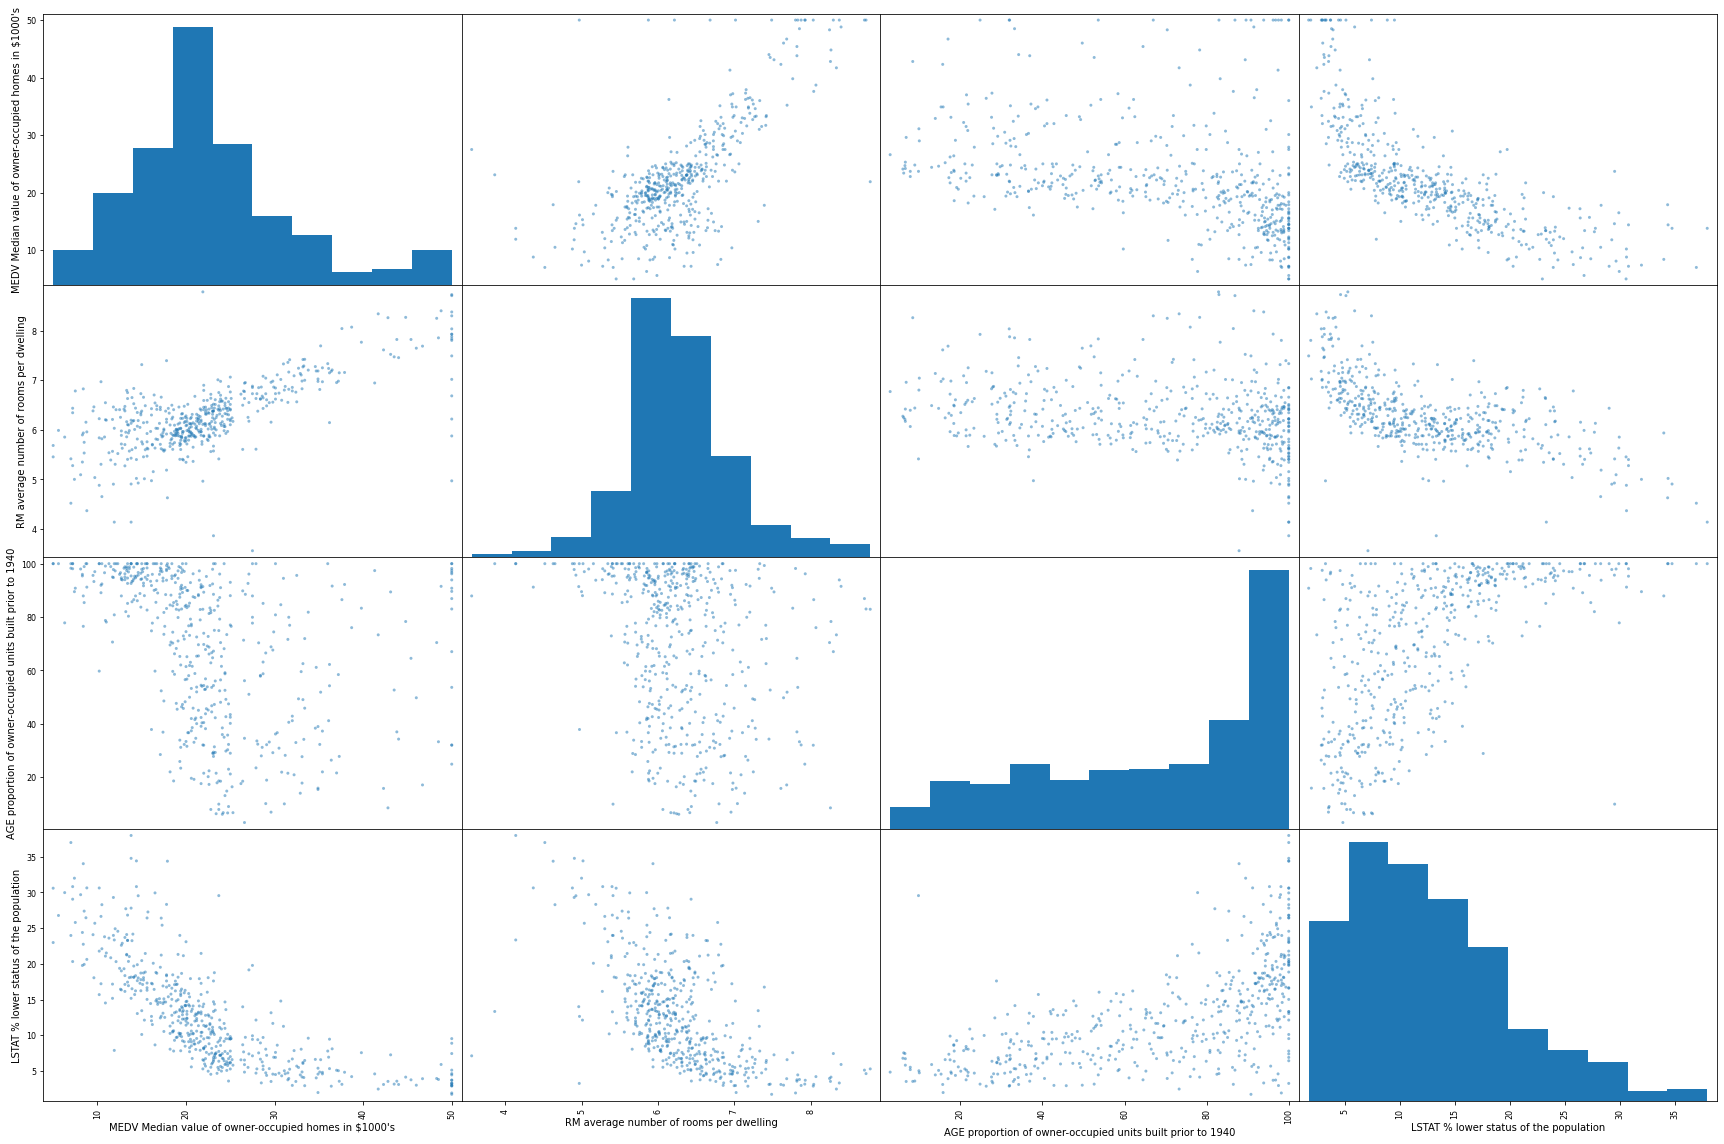

In [ ]:
from pandas.plotting import scatter_matrix

factors = ["MEDV Median value of owner-occupied homes in $1000's",
           "RM average number of rooms per dwelling", 
           "AGE proportion of owner-occupied units built prior to 1940", 
           "LSTAT % lower status of the population"]

scatter_matrix(housing[factors], figsize=(30, 20))

As you can see from the correlation matrix and the histograms shown above, the median value of the house (a good house price indicator) has a strong positive correlation with the average number of rooms per house. It also has a strong negative correlation with the % of lower status people in the population.

(0.0, 50.0, 0.0, 10.0)

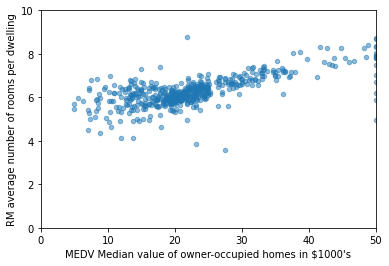

In [ ]:
housing.plot(kind="scatter", 
             x="MEDV Median value of owner-occupied homes in $1000's",
             y="RM average number of rooms per dwelling",
             alpha=0.5)
plt.axis([0, 50, 0, 10])

(0.0, 50.0, 0.0, 40.0)

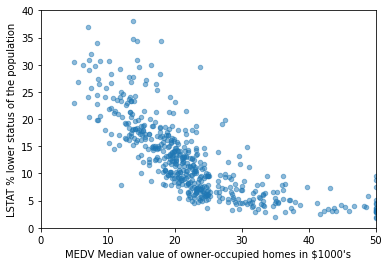

In [ ]:
housing.plot(kind="scatter", 
             x="MEDV Median value of owner-occupied homes in $1000's",
             y="LSTAT % lower status of the population",
             alpha=0.5)
plt.axis([0, 50, 0, 40])

# Step 4. Prepare the data for Machine Learning algorithms (aka Data Cleaning)

In [ ]:
housing = strat_train_set.drop("MEDV Median value of owner-occupied homes in $1000's", axis=1)
housing_labels = strat_train_set["MEDV Median value of owner-occupied homes in $1000's"].copy()

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,CRIM per capita crime rate by town,"ZN proportion of residential land zoned for lots over 25,000 sq.ft.",INDUS proportion of non-retail business acres per town,CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),NOX nitric oxides concentration (parts per 10 million),RM average number of rooms per dwelling,AGE proportion of owner-occupied units built prior to 1940,DIS weighted distances to five Boston employment centres,RAD index of accessibility to radial highways,"TAX full-value property-tax rate per $10,000",PTRATIO pupil-teacher ratio by town,B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town,LSTAT % lower status of the population,median_price


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
imputer.statistics_

array([2.29225e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.19850e+00, 7.68000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.89500e+01, 3.91250e+02, 1.14900e+01])

In [ ]:
housing_num.median().values

array([2.29225e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.19850e+00, 7.68000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.89500e+01, 3.91250e+02, 1.14900e+01])

In [ ]:
X = imputer.transform(housing_num)
print(X)

[[1.70900e-02 9.00000e+01 2.02000e+00 ... 1.70000e+01 3.84460e+02
  4.50000e+00]
 [3.67822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.80790e+02
  1.01900e+01]
 [4.29400e-02 2.80000e+01 1.50400e+01 ... 1.82000e+01 3.96900e+02
  1.05900e+01]
 ...
 [2.45220e-01 0.00000e+00 9.90000e+00 ... 1.84000e+01 3.96900e+02
  1.59400e+01]
 [8.89762e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  1.72100e+01]
 [6.32000e-03 1.80000e+01 2.31000e+00 ... 1.53000e+01 3.96900e+02
  4.98000e+00]]


In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [ ]:
housing_tr.loc[sample_incomplete_rows.index.values]

,CRIM per capita crime rate by town,"ZN proportion of residential land zoned for lots over 25,000 sq.ft.",INDUS proportion of non-retail business acres per town,CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),NOX nitric oxides concentration (parts per 10 million),RM average number of rooms per dwelling,AGE proportion of owner-occupied units built prior to 1940,DIS weighted distances to five Boston employment centres,RAD index of accessibility to radial highways,"TAX full-value property-tax rate per $10,000",PTRATIO pupil-teacher ratio by town,B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town,LSTAT % lower status of the population


In [ ]:
housing_tr.head()

,CRIM per capita crime rate by town,"ZN proportion of residential land zoned for lots over 25,000 sq.ft.",INDUS proportion of non-retail business acres per town,CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),NOX nitric oxides concentration (parts per 10 million),RM average number of rooms per dwelling,AGE proportion of owner-occupied units built prior to 1940,DIS weighted distances to five Boston employment centres,RAD index of accessibility to radial highways,"TAX full-value property-tax rate per $10,000",PTRATIO pupil-teacher ratio by town,B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town,LSTAT % lower status of the population
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19
94,0.04294,28.0,15.04,0.0,0.464,6.249,77.3,3.6150,4.0,270.0,18.2,396.90,10.59
149,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_prepared = num_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

array([[-3.96515759e-01,  3.27189259e+00, -1.31013941e+00, ...,
         3.07335542e-01, -1.16113135e+00,  1.39379456e+00],
       [ 4.31324293e-03, -5.01212852e-01,  9.99435788e-01, ...,
         2.67049535e-01, -3.41013947e-01, -3.17573443e-02],
       [-3.93685641e-01,  6.72642175e-01,  5.59927075e-01, ...,
         4.43890835e-01, -2.83360703e-01, -3.17573443e-02],
       ...,
       [-3.71539557e-01, -5.01212852e-01, -1.78332658e-01, ...,
         4.43890835e-01,  4.87751444e-01, -3.17573443e-02],
       [ 9.34293387e+00, -5.01212852e-01,  9.99435788e-01, ...,
         4.43890835e-01,  6.70800496e-01, -1.45730924e+00],
       [-3.97694883e-01,  2.53408237e-01, -1.26848662e+00, ...,
         4.43890835e-01, -1.09194746e+00, -3.17573443e-02]])

# Step 5. Select and train a model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [38.57837214 17.55635942 21.75186498 15.25210725 19.49372196]


In [ ]:
print("Labels:", list(some_labels))

Labels: [30.1, 20.8, 20.6, 15.4, 22.2]


In [ ]:
some_data_prepared

array([[-0.85384769,  1.90115114, -1.55455471,  0.        , -1.04410464,
         1.49821705, -1.32578657,  1.87204124, -0.46694217, -1.05390239,
        -0.47829873,  0.13822517, -1.34553825,  2.        ],
       [ 1.50443665, -0.67571034,  0.84810194,  0.        ,  0.9176786 ,
        -1.32774883,  1.0498775 , -0.7451806 ,  1.99747485,  1.82092246,
         1.14995227, -0.08426886, -0.31148738, -0.5       ],
       [-0.83719664,  0.12597989,  0.39087996,  0.        , -0.74983715,
         0.50726708,  0.30278846, -0.35051747, -0.59664833, -0.55575946,
         0.13229539,  0.89240112, -0.23879488, -0.5       ],
       [ 0.89620641, -0.67571034,  1.06924198,  0.        ,  1.46806779,
        -0.8415834 ,  0.99849042, -0.89608428, -0.46694217,  0.24246957,
        -1.64860414, -1.83875856,  1.73480661, -0.5       ],
       [-0.70959873, -0.67571034, -0.75366916,  0.        , -0.59180461,
         0.1638481 , -1.02536981,  0.11974112, -0.46694217, -0.45373018,
         0.84465521,  0.89

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.757650080441978

In [ ]:
housing_labels.describe()

count    404.000000
mean      22.526485
std        9.211624
min        5.000000
25%       17.075000
50%       21.200000
75%       25.025000
max       50.000000
Name: MEDV Median value of owner-occupied homes in $1000's, dtype: float64

With a mean of 22.5 and a standard deviation of 9.2, an RMSE of 2.757 is not terrible; but we can do better.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=3)
forest_reg.fit(housing, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

12.250512958748924

In [ ]:
housing_labels.describe()

count    404.000000
mean      22.526485
std        9.211624
min        5.000000
25%       17.075000
50%       21.200000
75%       25.025000
max       50.000000
Name: MEDV Median value of owner-occupied homes in $1000's, dtype: float64

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.43102577 1.42592142 2.4297207  2.17245649 2.44003297]
Mean: 2.1798314696543084
Standard deviation: 0.39030315937685534


The 5-fold cross-validation yields promising results

# Step 6. Fine tune your model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50, 100, 300] , 'max_features': [4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 8]},
  ]

forest_reg = RandomForestRegressor(random_state=3)
#lin_reg = LinearRegression()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=3,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 300}

Trying a matrix of 3x4=12 and 2x4=8 tests a lot of different parameters and how they affect my model. As shown above, the best combination of parameters is 10 features and 300 estimators.

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.78843990e-02, 7.99230145e-04, 5.90768652e-03, 4.36668575e-04,
       9.68851520e-03, 1.32359043e-01, 9.38208648e-03, 1.54930067e-02,
       1.73136806e-03, 6.74237289e-03, 7.91121617e-03, 5.52453788e-03,
       1.21100612e-01, 6.65039257e-01])

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MEDV Median value of owner-occupied homes in $1000's", axis=1)
y_test = strat_test_set["MEDV Median value of owner-occupied homes in $1000's"].copy()

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

17.0043373185723

The final RMSE is good, not great. I suspect my model has some overfitting of the data, but overall the model works well.

In [ ]:
print(final_predictions)

[36.97666667 36.868      36.85633333 44.77466667 36.88166667 44.785
 36.868      36.97666667 36.88166667 36.868      36.65066667 36.868
 36.88166667 36.88166667 36.85766667 36.88166667 36.868      36.75933333
 36.88166667 36.78033333 44.77466667 36.591      36.93433333 36.88166667
 36.85633333 44.77466667 36.83366667 44.73333333 36.83366667 36.868
 36.97666667 36.58766667 36.591      36.97666667 44.77466667 36.88166667
 44.73333333 36.97366667 36.88166667 36.88166667 36.606      36.868
 36.80833333 36.67433333 36.97366667 36.606      36.868      36.88166667
 36.80833333 36.80833333 36.88166667 44.785      36.80833333 36.88166667
 36.868      36.591      36.67566667 36.88166667 36.591      36.88166667
 36.85633333 36.868      36.88166667 36.606      44.73333333 36.86366667
 36.606      36.591      36.606      44.73333333 44.73333333 44.77466667
 36.963      36.97666667 36.88166667 36.83366667 36.97666667 36.80833333
 44.73333333 44.77466667 36.97666667 36.86366667 36.868      36.591
 44

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

15.92049346405228

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([15.85820847, 18.07794788])

# Step 7. Present your solution

# Pitch
I was able to download public data from the Boston housing market and fix the data to train a model which gave me wuite accurate predictions, but not precise predictions. This was what I did:

*   Download and import the data; read the file and set up the columns
*   Visualize the data with histograms and run statistics on them
*   Establish a correlation between paramaters and plot them using scatter plots
*   Create a pipeline to clean my data
*   Try out different models and pick teh best one to train
*   Play around with the hyperparamaters of my model to find the best 

Throughout this project I found that the Random Forest Regression model best fit my data. The cross validation scores were good for this model. It produced a pretty low RMSE of 17, which is pretty good. The 95% confidence interval centers around teh actual values. In closing, the model is a decent predictor of house prices in Boston.



# Step 8. Launch, maintain, and update